In [1]:
#loading need libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [59]:
#Load data for train and test
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Detecting Outliers

In [ ]:
#next most correlated variable, GrLivArea. 
#sns.scatterplot(train.OverallQual, train.SalePrice)
plt.scatter(x=train["GrLivArea"],y=train.SalePrice)
plt.axvline(x=4500, color='r')
plt.show()

In [ ]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

### Target variable
Target variable distribution

In [ ]:
plt.subplots(figsize=(8,8))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

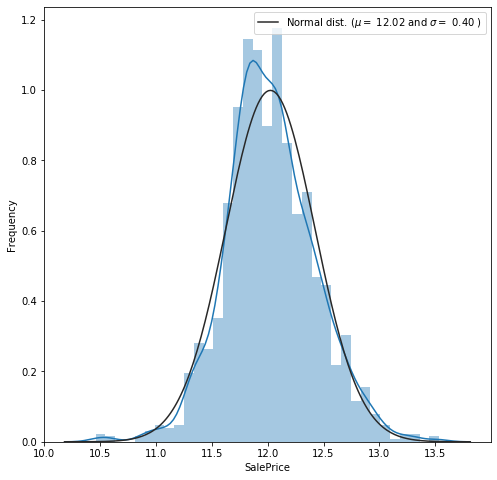

In [60]:
#we use log function which is in numpy
train['SalePrice'] = np.log1p(train['SalePrice'])

#Check again for more normal distribution

plt.subplots(figsize=(8,8))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

### Null Values
Checking null values in the data set

In [4]:
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

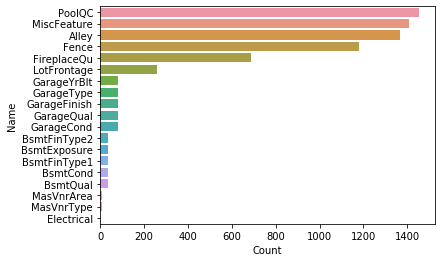

In [5]:
miss = train.isnull().sum()
miss = miss[miss>0]
miss.sort_values(inplace=True, ascending=False)
miss = pd.DataFrame(miss, columns=['Count'])
miss['Name'] = miss.index
miss_cols = miss['Name'].tolist()
sns.barplot(x='Count',y='Name',data=miss)

### Corralation between train attributes
Top 50% Corralation train attributes with sale-price

In [ ]:
#Coralation plot
corr = train.corr()
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [7]:
print("Find most important features relative to target")
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Find most important features relative to target


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

OverallQual is highly correlated with target feature of saleprice by 82%

In [ ]:
sns.scatterplot(train.OverallQual, train.SalePrice)

In [ ]:
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.set(style='ticks')
sns.pairplot(train[col], size=3, kind='reg')

### Features engineering

In [61]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 80)


### Imputing missing values

In [62]:
# PoolQC has missing value ratio is 99%+. So, there is fill by None
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')

In [63]:
#Arround 50% missing values attributes have been fill by None
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')
all_data['Alley'] = all_data['Alley'].fillna('None')
all_data['Fence'] = all_data['Fence'].fillna('None')
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')

In [64]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data['LotFrontage'] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [65]:
#GarageType, GarageFinish, GarageQual and GarageCond these are replacing with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:all_data[col] = all_data[col].fillna('None')

In [66]:
#GarageYrBlt, GarageArea and GarageCars these are replacing with zero
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:all_data[col] = all_data[col].fillna(int(0))

In [67]:
#BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual these are replacing with None
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):all_data[col] = all_data[col].fillna('None')

In [68]:
#MasVnrArea : replace with zero
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(int(0))

In [69]:
#MasVnrType : replace with None
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')

In [70]:
#There is put mode value 
all_data['Electrical'] = all_data['Electrical'].fillna(train['Electrical']).mode()[0]

In [71]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [72]:
#data description says NA means typical
all_data["Functional"] = all_data["Functional"].fillna("Typ")

BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement

In [73]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [74]:
# Fill with most frequent which is "WD"
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

In [75]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [76]:
#Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQua
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [77]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

In [78]:
#There is no need of Utilities
all_data = all_data.drop(['Utilities'], axis=1)

In [79]:
miss = all_data.isnull().sum()
miss = miss[miss>0]
miss.sort_values(inplace=True, ascending=False)
print(miss)

Series([], dtype: int64)


### Label Encoding some categorical variables
Transforming some numerical variables that are really categorical

In [80]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')

In [81]:
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

### Prepraring data for prediction

In [82]:
train = all_data[:ntrain]
test = all_data[ntrain:]

### Modelling

In [31]:
from sklearn.linear_model import  LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [32]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [83]:
models = []
rmse = []

### Gradient Boosting Regression :

In [84]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [85]:
GBoost.fit(train, y_train)
GBoost_train_pred = GBoost.predict(train)
GBoost_pred = np.expm1(GBoost.predict(test))
print(rmsle(y_train, GBoost_train_pred))
models.append('GB')
rmse.append(round(np.sqrt(mean_squared_error(GBoost_train_pred, y_train)),2))

0.052009039970756454


In [86]:
lmodel = LinearRegression()
lmodel.fit(train.values, y_train)
lmodel_train_pred = lmodel.predict(train.values)
lmodel_pred = np.expm1(lmodel.predict(test.values))
rms = rmsle(y_train, lmodel_train_pred)
print(rms)
models.append('LR')
rmse.append(round(np.sqrt(mean_squared_error(lmodel_train_pred, y_train)),2))

0.13402017708056976


In [87]:
rfmodel=RandomForestRegressor(n_estimators=100, random_state =42)
rfmodel.fit(train, y_train)
rfmodel_train_pred = rfmodel.predict(train)
rfmodel_pred = np.expm1(rfmodel.predict(test))
rms = rmsle(y_train, rfmodel_train_pred)
print(rms)
models.append('RF')
rmse.append(round(np.sqrt(mean_squared_error(rfmodel_train_pred, y_train)),2))

0.05353690679168917


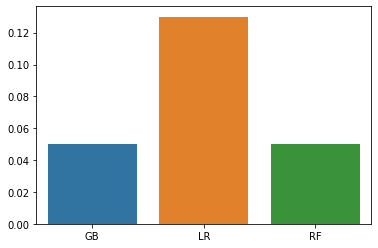

In [88]:
sns.barplot(models,rmse)

In [91]:
pred_df = pd.DataFrame()
pred_df['Actual'] = np.expm1(y_train)
pred_df['GB_Prediction'] = np.expm1(GBoost_train_pred)
pred_df['LM_Prediction'] = np.expm1(lmodel_train_pred)
pred_df['RF_Prediction'] = np.expm1(rfmodel_train_pred)
pred_df

,Actual,GB_Prediction,LM_Prediction,RF_Prediction
0,208500.0,207185.523304,207900.527961,205836.283004
1,181500.0,181373.507605,201012.879855,176473.219243
2,223500.0,223125.685699,217001.401496,219998.629246
3,140000.0,141533.295167,165406.884606,155720.156452
4,250000.0,256350.690065,300008.948746,253335.848650
...,...,...,...,...
1455,175000.0,175466.372346,173556.698036,176809.958783
1456,210000.0,207777.878096,210700.316605,208210.967909
1457,266500.0,266033.915240,221665.185602,262958.237307
1458,142125.0,141904.657409,143731.872832,138113.572104


In [92]:
models = ['GB','LM', 'RF']

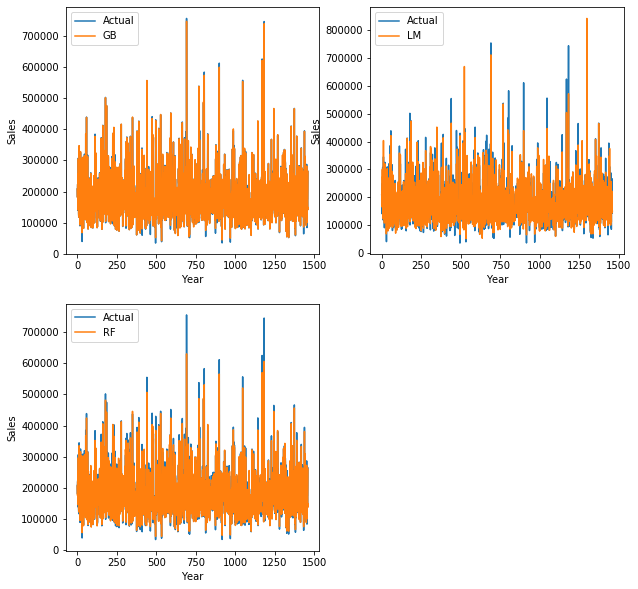

In [94]:
plt.figure(figsize=(10,10))

for idx, model in enumerate(models):
    plt.subplot(2,2,idx+1)
    plt.plot(pred_df['Actual'], label='Actual')
    plt.plot(pred_df[model.replace(' ','') + '_Prediction'],
             label=model)
    plt.xlabel('Year')
    plt.ylabel('Sales')
    plt.legend()